In [18]:
import numpy as np
import pandas as pd

In [16]:
cd\Users\Deepak\Desktop

C:\Users\Deepak\Desktop


In [17]:
data = pd.read_csv('data_stocks.csv')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [23]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [46]:
"""there are no object type features so we do not need any one hot coding or lable encoding.
Since the feature size is 502 hence we need to apply dimension reduction technique.
We will use principal component analysis for this purpose"""

'there are no object type features so we do not need any one hot coding or lable encoding.\nSince the feature size is 502 hence we need to apply dimension reduction technique.\nWe will use principal component analysis for this purpose'

In [47]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components= 0.95)

In [54]:
data_pca = pca.fit_transform(data)

In [55]:
data_pca.shape

(41266, 1)

In [65]:
"""lets drop date column and then use the dataframe to normalise the data and then apply PCA"""

'lets drop date column and then use the dataframe to normalise the data and then apply PCA'

In [64]:
data_ = data.drop('DATE', axis = 1)

In [66]:
data_.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [67]:
from sklearn.preprocessing import Normalizer

In [68]:
normal = Normalizer()

In [70]:
data_nom = normal.fit_transform(data_)

In [72]:
data_nom.shape

(41266, 501)

In [88]:
data_pca = pca.fit_transform(data_nom)

In [177]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
returns = data.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)

In [ ]:
distortions = []
for i in range(1,50):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(data_pca)
    distortions.append(km.inertia_)
plt.plot(range (1,50),distortions, marker = 'o')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

In [162]:
from math import sqrt

In [186]:
"""Calculate average annual percentage return and volatilities over a theoretical one year period"""

'Calculate average annual percentage return and volatilities over a theoretical one year period'

In [200]:
returns = data_.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = data_.pct_change().std() * sqrt(252)

In [187]:
"""format the data as a numpy array to feed into the K-Means algorithm"""

'format the data as a numpy array to feed into the K-Means algorithm'

In [201]:
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [185]:
"""Our first decision is to choose how many clusters do we actually want to separate the data into. Rather than make some arbitrary decision we can use an “Elbow Curve” to highlight the relationship between how many clusters we choose, and the Sum of Squared Errors (SSE) resulting from using that number of clusters."""

'Our first decision is to choose how many clusters do we actually want to separate the data into. Rather than make some arbitrary decision we can use an “Elbow Curve” to highlight the relationship between how many clusters we choose, and the Sum of Squared Errors (SSE) resulting from using that number of clusters.'

Text(0.5, 1.0, 'Elbow curve')

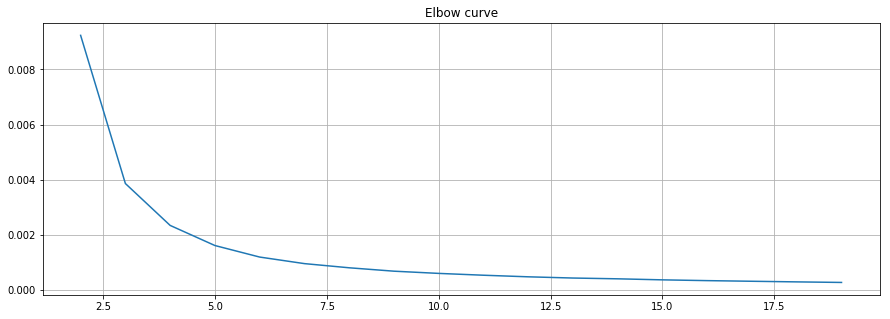

In [202]:
X = data
distortions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)
 
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distortions)
plt.grid(True)
plt.title('Elbow curve')

In [214]:
"""from this elbow method we found that 4 could be the optimal number of clusters to fit with."""

'from this elbow method we found that 4 could be the optimal number of clusters to fit with.'

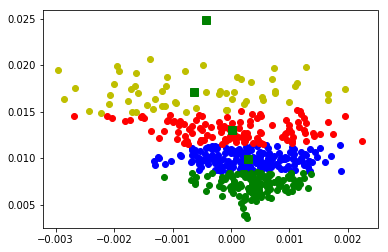

In [215]:
# computing K-Means with K = 4 (4 clusters)
km = KMeans(n_clusters=5,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(data)
# some plotting using numpy's logical indexing
plt.plot(data[y_km==0,0],data[y_km==0,1],'ob',
     data[y_km==1,0],data[y_km==1,1],'oy',
     data[y_km==2,0],data[y_km==2,1],'or',
     data[y_km==3,0],data[y_km==3,1],'og',)
plt.plot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],'sg',markersize=8)
plt.show()

In [183]:
"""there is an outlier hence we need to drop it."""

'there is an outlier hence we need to drop it.'

In [204]:
#identify the outlier
print(returns.idxmax())

Returns       NYSE.XRX
Volatility    NYSE.XRX
dtype: object


In [205]:
returns.drop('NYSE.XRX',inplace=True)
 
#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [189]:
"""re-run the K means algorithm to get results"""

're-run the K means algorithm to get results'

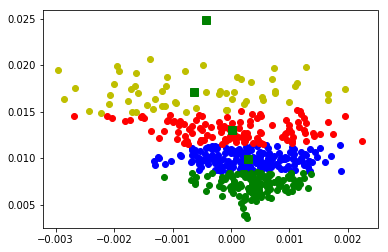

In [216]:
# computing K-Means with K = 4 (4 clusters)
km = KMeans(n_clusters=5,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(data)
# some plotting using numpy's logical indexing
plt.plot(data[y_km==0,0],data[y_km==0,1],'ob',
     data[y_km==1,0],data[y_km==1,1],'oy',
     data[y_km==2,0],data[y_km==2,1],'or',
     data[y_km==3,0],data[y_km==3,1],'og')
plt.plot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],'sg',markersize=8)
plt.show()

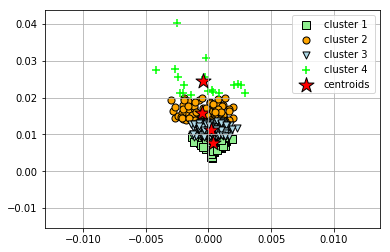

In [210]:
plt.scatter(data[y_km == 0, 0],data[y_km == 0, 1],s=50, c='lightgreen',marker='s', edgecolor='black',label='cluster 1')
plt.scatter(data[y_km == 1, 0],data[y_km == 1, 1],s=50, c='orange',marker='o', edgecolor='black',label='cluster 2')
plt.scatter(data[y_km == 2, 0],data[y_km == 2, 1],s=50, c='lightblue',marker='v', edgecolor='black',label='cluster 3')
plt.scatter(data[y_km == 3, 0],data[y_km == 3, 1],s=50, c='lime',marker='+', edgecolor='black',label='cluster 4')
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],s=250, marker='*',c='red', edgecolor='black',label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [208]:
details = [(name,cluster) for name, cluster in zip(returns.index,y_km)]
 
for detail in details:
    print(detail)

('SP500', 0)
('NASDAQ.AAL', 1)
('NASDAQ.AAPL', 2)
('NASDAQ.ADBE', 2)
('NASDAQ.ADI', 2)
('NASDAQ.ADP', 2)
('NASDAQ.ADSK', 1)
('NASDAQ.AKAM', 1)
('NASDAQ.ALXN', 1)
('NASDAQ.AMAT', 2)
('NASDAQ.AMD', 3)
('NASDAQ.AMGN', 0)
('NASDAQ.AMZN', 2)
('NASDAQ.ATVI', 2)
('NASDAQ.AVGO', 2)
('NASDAQ.BBBY', 1)
('NASDAQ.BIIB', 2)
('NASDAQ.CA', 1)
('NASDAQ.CBOE', 0)
('NASDAQ.CELG', 2)
('NASDAQ.CERN', 2)
('NASDAQ.CHRW', 2)
('NASDAQ.CHTR', 1)
('NASDAQ.CINF', 2)
('NASDAQ.CMCSA', 2)
('NASDAQ.CME', 0)
('NASDAQ.COST', 2)
('NASDAQ.CSCO', 2)
('NASDAQ.CSX', 2)
('NASDAQ.CTAS', 2)
('NASDAQ.CTSH', 0)
('NASDAQ.CTXS', 2)
('NASDAQ.DISCA', 1)
('NASDAQ.DISCK', 1)
('NASDAQ.DISH', 2)
('NASDAQ.DLTR', 1)
('NASDAQ.EA', 1)
('NASDAQ.EBAY', 2)
('NASDAQ.EQIX', 2)
('NASDAQ.ESRX', 1)
('NASDAQ.ETFC', 2)
('NASDAQ.EXPD', 2)
('NASDAQ.EXPE', 2)
('NASDAQ.FAST', 1)
('NASDAQ.FB', 2)
('NASDAQ.FFIV', 1)
('NASDAQ.FISV', 0)
('NASDAQ.FITB', 2)
('NASDAQ.FLIR', 2)
('NASDAQ.FOX', 2)
('NASDAQ.FOXA', 2)
('NASDAQ.GILD', 0)
('NASDAQ.GOOG', 0)
('NASDAQ.